# Outlier Handling
## How to Detect Outliers
### Statistical Methods

- Z-Score
- IQR (Interquartile Range)
### Visualization Techniques
- Box Plots
- Scatter Plots
- Histogram/Distribution Plots
- Machine Learning Methods
### Isolation Forest
- One-Class SVM
- DBSCAN (Density-Based Spatial Clustering)

## How to Handle Outliers
### Remove Outliers
Best when the outliers are due to data entry or measurement errors.
Use filtering based on Z-score or IQR.

### Cap or Floor Outliers (Winsorization)
Replace extreme values with a specified percentile (e.g., 1st and 99th).

### Transform Data
Apply log, square root, or Box-Cox transformations to reduce the effect of outliers.

### Impute Outliers
Replace outliers with mean, median, or mode values.

### Use Robust Models
Models like Random Forest, XGBoost, or Robust Regression are less sensitive to outliers.



## References
- https://datasciencehorizons.com/wp-content/uploads/2023/06/Data_Cleaning_and_Preprocessing_for_Data_Science_Beginners_Data_Science_Horizons_2023_Data_Science_Horizons_Final_2023.pdf
- https://eurocc.cyi.ac.cy/wp-content/uploads/202305_Training_Efficient_Data_Cleaning.pdf
- http://103.203.175.90:81/fdScript/RootOfEBooks/E%20Book%20collection%20-%202024%20-%20B/CSE%20%20IT%20AIDS%20ML/Data%20Preparation%20for%20Machine%20Learning.pdf
- https://www.kdnuggets.com/how-to-handle-outliers-in-dataset-with-pandas

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df=pd.read_csv('https://github.com/dashbikash/datasets/raw/refs/heads/main/Diabetes.csv')
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Here bmi,dpf are float hence these are continuous numeric variable and outliers occurs.

In [45]:
df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


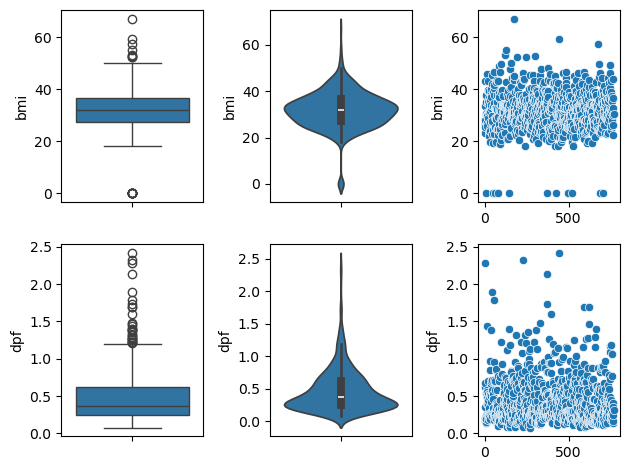

In [48]:
def outlier_plot(data:pd.DataFrame):
    plot_index=230
    for key in data.keys():
        plot_index=plot_index+1  
        plt.subplot(plot_index) # 1 row, 2 columns, first plot
        sns.boxplot(data[key])
        
        plot_index=plot_index+1  
        plt.subplot(plot_index) # 1 row, 2 columns, first plot
        sns.violinplot(data[key])
        
        plot_index=plot_index+1        
        plt.subplot(plot_index) # 1 row, 2 columns, second plot
        sns.scatterplot(data[key])
        
    plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
    plt.show()

outlier_plot(df[['bmi','dpf']])

In [49]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

## Remove Outliers

In [50]:
bmi_outliers=detect_outliers_iqr(df['bmi'])
dpf_outliers=detect_outliers_iqr(df['dpf'])
print( sum(bmi_outliers), sum(dpf_outliers))

19 29


In [51]:
df=df[~(bmi_outliers|dpf_outliers)]

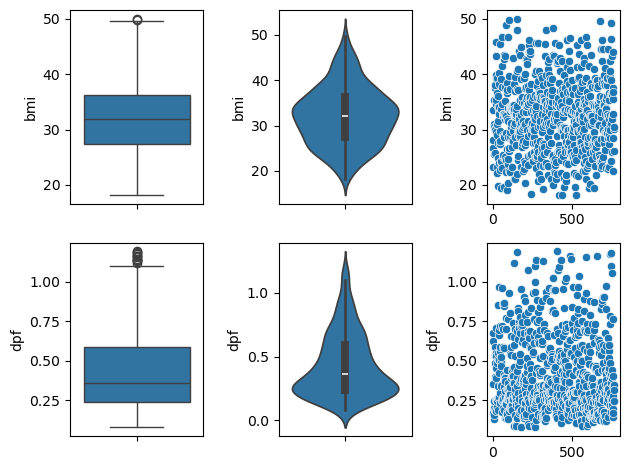

In [52]:
outlier_plot(df[['bmi','dpf']])

### Capping Outliers

In [53]:
df=pd.read_csv('https://github.com/dashbikash/datasets/raw/refs/heads/main/Diabetes.csv')
bmi_outliers=detect_outliers_iqr(df['bmi'])
dpf_outliers=detect_outliers_iqr(df['dpf'])
print( sum(bmi_outliers), sum(dpf_outliers))

19 29


In [54]:
def cap_outliers(series: pd.Series):
    lower = series.quantile(0.05)
    upper = series.quantile(0.95)
    
    return series.clip(lower, upper)

df['bmi']=cap_outliers(df['bmi'])
df['dpf']=cap_outliers(df['dpf'])

In [55]:
bmi_outliers=detect_outliers_iqr(df['bmi'])
dpf_outliers=detect_outliers_iqr(df['dpf'])
print( sum(bmi_outliers), sum(dpf_outliers))

0 0


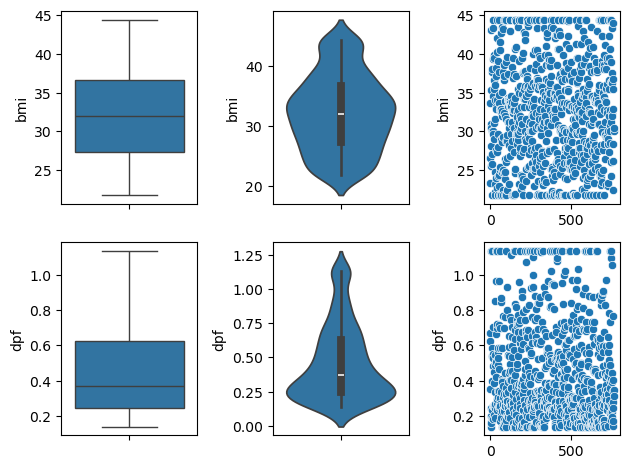

In [56]:
outlier_plot(df[['bmi','dpf']])

## Log Transform

In [57]:
df=pd.read_csv('https://github.com/dashbikash/datasets/raw/refs/heads/main/Diabetes.csv')
bmi_outliers=detect_outliers_iqr(df['bmi'])
dpf_outliers=detect_outliers_iqr(df['dpf'])
print( sum(bmi_outliers), sum(dpf_outliers))

19 29


In [58]:
df['bmi']=np.log1p(df['bmi'])
df['dpf']=np.log1p(df['dpf'])

In [59]:
bmi_outliers=detect_outliers_iqr(df['bmi'])
dpf_outliers=detect_outliers_iqr(df['dpf'])
print( sum(bmi_outliers), sum(dpf_outliers))

14 13


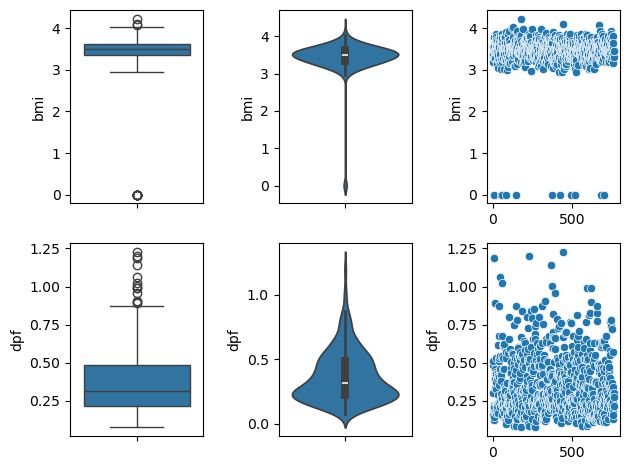

In [60]:
outlier_plot(df[['bmi','dpf']])

## Imputing

In [61]:
df=pd.read_csv('https://github.com/dashbikash/datasets/raw/refs/heads/main/Diabetes.csv')
bmi_outliers=detect_outliers_iqr(df['bmi'])
dpf_outliers=detect_outliers_iqr(df['dpf'])
print( sum(bmi_outliers), sum(dpf_outliers))

19 29


In [62]:
df.loc[bmi_outliers, 'bmi'] = np.mean(df['bmi'])
df.loc[bmi_outliers, 'dpf'] = np.mean(df['dpf'])

In [63]:
bmi_outliers=detect_outliers_iqr(df['bmi'])
dpf_outliers=detect_outliers_iqr(df['dpf'])
print( sum(bmi_outliers), sum(dpf_outliers))

3 31


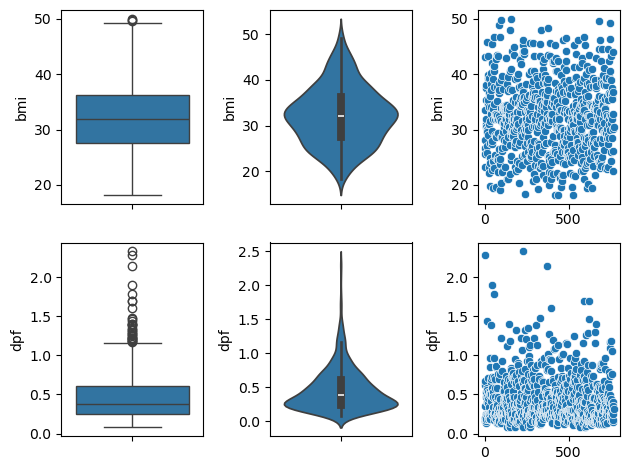

In [64]:
outlier_plot(df[['bmi','dpf']])